In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r"F:\DSA\Data Sets ICT\car_age_price.csv")

In [3]:
data.head(5)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isnull().sum()

#No Null Value Filling

Year     0
Price    0
dtype: int64

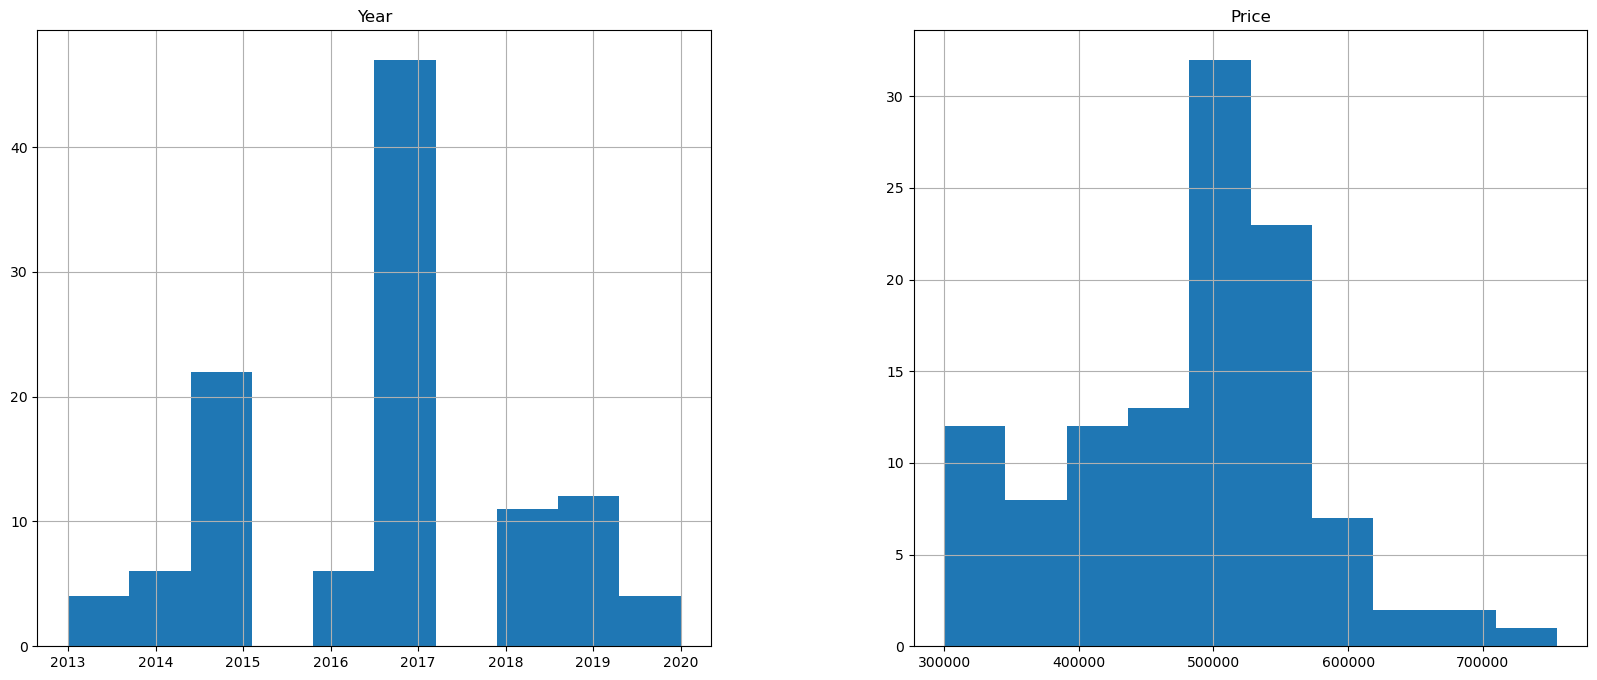

In [7]:
graphs = data.select_dtypes(include = 'int64')
graphs.hist(figsize = (20,8))
plt.show()

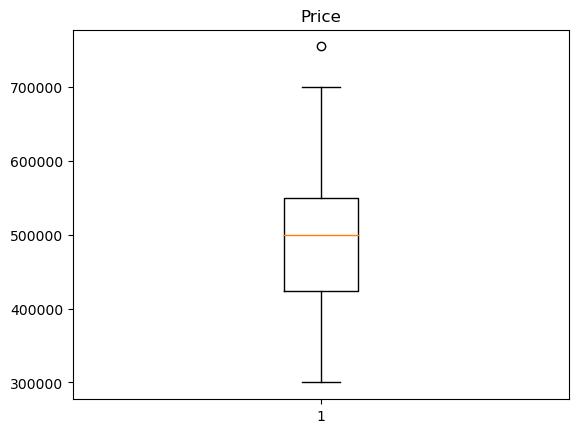

In [8]:
##CHECKING FOR OUTLIERS IN PRICE

plt.boxplot(data['Price'])
plt.title("Price")
plt.show()

In [9]:
#REMOVING OUTLIERS FOR THE MODEL

def iqr_clipping(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=low_lim, upper=up_lim)
    return data
columns = ['Price']
data = iqr_clipping(data, columns)

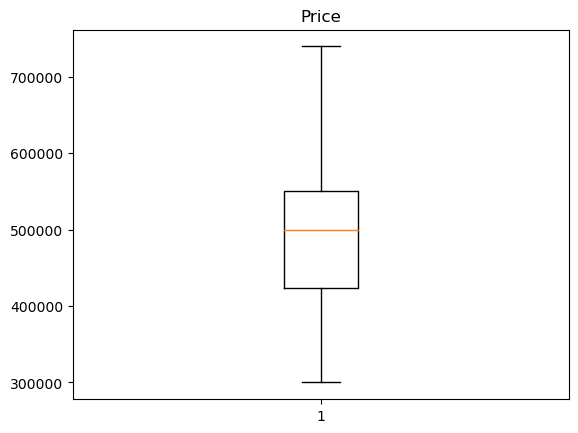

In [10]:
plt.boxplot(data['Price'])
plt.title("Price")
plt.show()

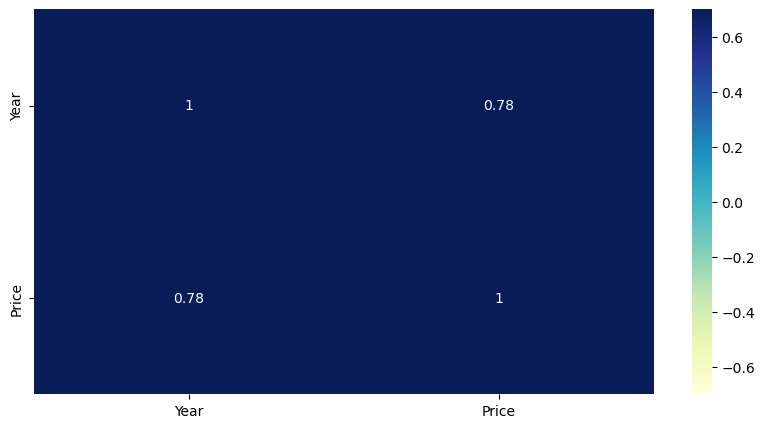

In [11]:
#FINDING CORRELATION BETWEEN TARGET VARIABLE AND FEATURE

plt.subplots(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True,vmin = -0.7, vmax = 0.7, cmap = 'YlGnBu')
plt.show()

In [12]:
#LINEAR REGRESSION MODELLING

x = data[['Year']]
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_predictions = linear_model.predict(x_test)

In [13]:
##LASSO REGRESSION MODELLING

lasso_model = Lasso(alpha = 5) 
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)

In [14]:
linear_score = linear_model.score(x_test, y_test)
lasso_score = lasso_model.score(x_test, y_test)

print("Linear Score is ", linear_score)
print("Lasso Score is ", lasso_score)
if linear_score > lasso_score:
    print("The better model in this scenario is Linear Regression Model")
else:
    print("The better model in this scenario is Lasso Regression Model")

Linear Score is  0.43809568049355074
Lasso Score is  0.43811809597099804
The better model in this scenario is Lasso Regression Model


In [15]:
#PREDICTION OF A 2022 MODEL SECOND HAND GRAN i10 USING THE MODEL

linear_2022 = linear_model.predict(np.array([[2022]]))
lasso_2022 = lasso_model.predict(np.array([[2022]]))
print("Predicted Price for a 2022 model using Linear Regression:", linear_2022[0])
print("Predicted Price for a 2022 model using Lasso Regression:", lasso_2022[0])

Predicted Price for a 2022 model using Linear Regression: 739002.0571428686
Predicted Price for a 2022 model using Lasso Regression: 738991.2452616692


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


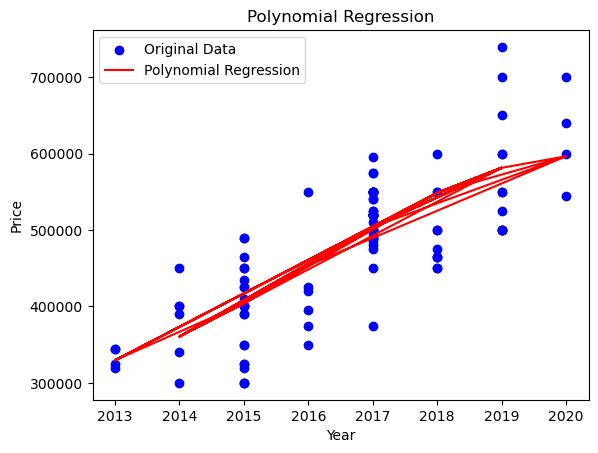

In [16]:
#The model has insufficient data to predict the car price properly. Check the
#polynomial regression to understand the failure in fitting such data into a regression.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 3)
x_poly = poly_features.fit_transform(data[['Year']])
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred = poly_model.predict(x_poly)

plt.scatter(data['Year'], y, color='blue', label='Original Data')
plt.plot(data['Year'], y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()